# Auswertung - Verteilung der Daten

In diesem ersten Abschnitt soll die Verteilung, der bei der Evaluierung vom 12.6 - 14.6 erhobenen Daten, festgestellt werden. Dabei ist einersteits interessant wie viele Datenpunkte pro Person, Area of Interest (AOI) bzw. pro Position erhoben wurden. Dieses erste Teil der Auswertung soll daher einen ersten Überblick über die erobenen Daten gewähren und zusätzlich Indiezien darüber liefern, welche erste Limitationen für das, der Evaluation zu grundelegende, System erkannt werden können.

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import math

from datetime import datetime

In [82]:
root = '../0_annotation'
file_names = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        if 'annotation' not in file or '.csv' not in file:
            continue
        file_names.append(os.path.join(subdir, file).replace('\\', '/'))

In [83]:
info_titles = [
    'Frames',
    'Zeitpunkt',
    'Test Person',
    'Frames mit Gesicht',
    'Frames mit Blick',
    'Dateipfad'
]


info_data = []
counter_gaze = []
frames_with_face = []
testers = []

for f in file_names:
    df = pd.read_csv(f, sep=',', engine='python')
    count_total = len(df['frame'])
    last_ts = datetime.fromtimestamp(df['server_timestamp'][count_total - 1])
    test_person = str((df['annotation_test_person_id'][count_total - 1]))[:-1]
    count_face = len(df[(df[['eye_lmk_X_0','eye_lmk_Y_0','eye_lmk_Z_0']] != 0).all(axis=1)]['frame'])
    count_gaze = len(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['frame'])
    
    info_data.append([count_total, last_ts, test_person, count_face, count_gaze, f])
    counter_gaze.append(count_gaze)
    frames_with_face.append(count_face)
    testers.append(test_person)

pd.DataFrame(info_data, columns=info_titles)

,Frames,Zeitpunkt,Test Person,Frames mit Gesicht,Frames mit Blick,Dateipfad
0,12592,2019-06-12 13:32:37,10,12592,302,../0_annotation/10__annotation_2019_06_12_14:1...
1,17297,2019-06-13 11:51:23,30,17297,231,../0_annotation/30__annotation_2019_06_13_12:3...
2,15278,2019-06-13 11:14:16,29,15278,311,../0_annotation/29__annotation_2019_06_13_11:5...
3,17324,2019-06-13 10:32:24,26,17324,308,../0_annotation/26__annotation_2019_06_13_11:1...
4,17325,2019-06-12 14:52:33,12,17325,891,../0_annotation/12__annotation_2019_06_12_15:3...
5,12190,2019-06-12 17:31:58,20,12190,350,../0_annotation/20__annotation_2019_06_12_18:1...
6,17398,2019-06-14 15:44:05,45,17398,339,../0_annotation/45__annotation_2019_06_14_16:2...
7,15831,2019-06-14 11:37:53,43,15831,218,../0_annotation/43__annotation_2019_06_14_12:2...
8,15961,2019-06-13 10:04:36,25,15961,336,../0_annotation/25__annotation_2019_06_13_10:4...
9,16173,2019-06-13 14:34:27,36,16173,753,../0_annotation/36__annotation_2019_06_13_15:1...


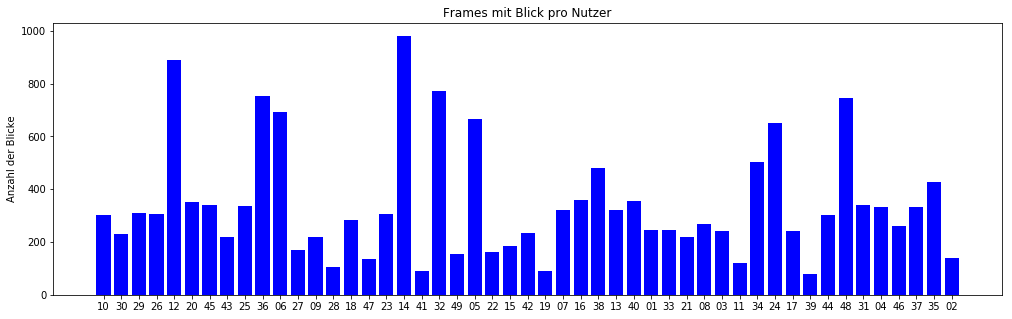

In [87]:
y_pos = np.arange(len(testers))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

plt.bar(y_pos, counter_gaze, align='center', color = 'b')
plt.xticks(y_pos, testers)
plt.ylabel('Anzahl der Blicke')
plt.title('Frames mit Blick pro Nutzer')

plt.show()


Frames mit Gesicht: 723511
Frames mit Blick: 16823
Verhältnis zwischen Gesicht (97.73%) und Blick(2.27%)


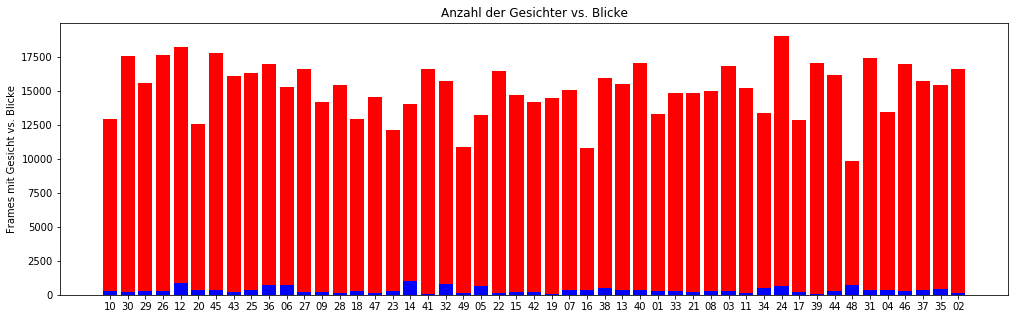

In [97]:
y_pos = np.arange(len(testers))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

plt.bar(y_pos, counter_gaze, align='center', color = 'b')
plt.bar(y_pos, frames_with_face, align='center', color = 'r', bottom = counter_gaze)
plt.xticks(y_pos, testers)
plt.ylabel('Frames mit Gesicht vs. Blicke')
plt.title('Anzahl der Gesichter vs. Blicke')

sum_face = np.sum(frames_with_face)
sum_gaze = np.sum(counter_gaze)

percent_face = str(round(sum_face / ((sum_face + sum_gaze)/100), 2))
percent_gaze = str(round(sum_gaze / ((sum_face + sum_gaze)/100), 2))


print("Frames mit Gesicht: " + str(sum_face))
print("Frames mit Blick: " + str(sum_gaze))
print("Verhältnis zwischen Gesicht (" + percent_face + "%) und Blick(" + percent_gaze + "%)")

plt.show()